In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math, random

In [2]:
def estimate(method, runs, samples_per_run):
    estimates = []
    for i in range(runs):
        estimates.append(method(samples_per_run))
    return estimates

In [3]:
def pi_by_area(n):
    hits = 0
    for i in range(n):
        d = math.pow(random.random(), 2.) + math.pow(random.random(), 2.) 
        if d <= 1.0:
            hits += 1
    return (float(hits) / float(n)) * 4.

In [4]:
def pi_by_average_height(n):
    sum = 0.
    for i in range(n):
        r = random.random()
        sum += math.sqrt(1. - math.pow(r, 2.))
    return (sum / float(n)) * 4.

In [5]:
def pi_by_average_height_with_antithetic_variates(n):
    sum = 0.
    for i in range(n):
        r = random.random()
        sum += math.sqrt(1. - math.pow(r, 2.))
        sum += math.sqrt(1. - math.pow((1. - r), 2.))
    return (sum / float(n)) * 2.

In [35]:
def pi_by_average_height_with_antithetic_and_control_variates(n):
    sum = 0.
    c = [ math.pow(float(x) * 0.0001, 2.) for x in range(10000) ]
    f = [ math.sqrt(1. - math.pow(float(x) * 0.0001, 2.)) for x in range(10000) ]
    b = np.cov(f,c)[0,1]/np.var(c)
    for i in range(n):
        r = random.random()
        sum += math.sqrt(1. - math.pow(r, 2.)) + (b * (math.pow(r, 2.) - (1. / 3.)))
        sum += math.sqrt(1. - math.pow((1. - r), 2.)) + (b * (math.pow((1. - r), 2.) - (1. / 3.)))
    return (sum / float(n)) * 2.

In [36]:
def pi_by_probability_of_coprimality(n):
    hits = 0
    for i in range(n):
        n1 = random.randrange(100000)
        n2 = random.randrange(100000)
        if math.gcd(n1, n2) == 1:
            hits += 1
    return math.sqrt(6. / (float(hits) / float(n)))

In [39]:
runs = 1000
samples_per_run = 10000
data_to_plot = [
    estimate(pi_by_area, runs, samples_per_run),
    estimate(pi_by_probability_of_coprimality, runs, samples_per_run),
    estimate(pi_by_average_height, runs, samples_per_run),
    estimate(pi_by_average_height_with_antithetic_variates, runs, samples_per_run),
    estimate(pi_by_average_height_with_antithetic_and_control_variates, runs, samples_per_run)
]

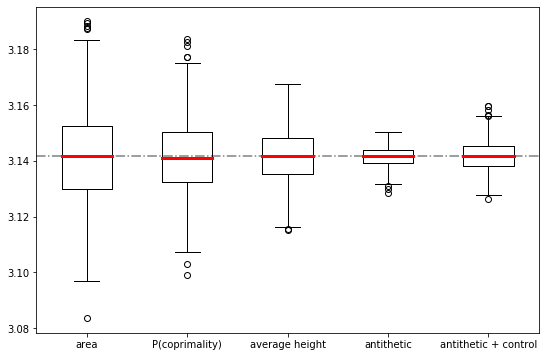

In [40]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.set_xticklabels(['area', 'P(coprimality)', 'average height', 'antithetic', 'antithetic + control'])
ax.axhline(y=math.pi, color='gray', linestyle='-.')
bp = ax.boxplot(data_to_plot)
for median in bp['medians']:
    median.set(color='red', linewidth=3)